In [39]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import numpy as np 
import pandas as pd
import os
import random

import joblib

import matplotlib.pyplot as plt 

from sklearn.pipeline import Pipeline 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from utils import clean_text, CleanTextTransformer

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/wizardcalidad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/wizardcalidad/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
tweet = pd.read_csv('tweets.csv')

In [4]:
tweet.head(3)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative


In [5]:
tweet.shape

(27481, 4)

In [6]:
tweet.isna().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [7]:
df = tweet.dropna()

In [8]:
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [9]:
df.isna().sum()

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

In [10]:
df.sentiment

0         neutral
1        negative
2        negative
3        negative
4        negative
           ...   
27476    negative
27477    negative
27478    positive
27479    positive
27480     neutral
Name: sentiment, Length: 27480, dtype: object

neutral     11117
positive     8582
negative     7781
Name: sentiment, dtype: int64



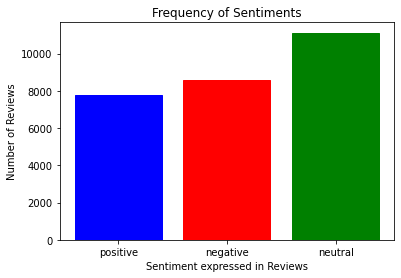

In [11]:
Index = [2,1,0]
print(df.sentiment.value_counts())
print()
barlist = plt.bar(Index, df.sentiment.value_counts())


plt.title("Frequency of Sentiments")
plt.xticks(Index,['neutral', 'negative', 'positive'])
plt.ylabel('Number of Reviews')
plt.xlabel('Sentiment expressed in Reviews')
barlist[Index[2]].set_color('green')
barlist[Index[1]].set_color('red')
barlist[Index[0]].set_color('blue')
plt.show()

In [16]:
indexNames = df[ df['sentiment'] == 'neutral' ].index
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

/home/wizardcalidad/unilondon/twt/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
df.head()

,textID,text,selected_text,sentiment
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive


In [18]:
df.shape

(16363, 4)

In [20]:
df = df.drop(columns=['textID'])

In [21]:
df.head(3)

,text,selected_text,sentiment
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,my boss is bullying me...,bullying me,negative
3,what interview! leave me alone,leave me alone,negative


In [25]:
X = df["selected_text"]
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [26]:
cv_NB = Pipeline([
      ('clean_text', CleanTextTransformer()),
      ('bow', CountVectorizer(stop_words="english")),
      ('classifier', MultinomialNB())
])

In [27]:
cv_NB.fit(X_train, y_train)

Pipeline(steps=[('clean_text', CleanTextTransformer()),
                ('bow', CountVectorizer(stop_words='english')),
                ('classifier', MultinomialNB())])

In [28]:
joblib.dump(cv_NB, "tweets_multinomial_with_count_vectorizer.joblib")

['tweets_multinomial_with_count_vectorizer.joblib']

In [29]:
y_pred = cv_NB.predict(X_test) #predict testing data

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.92      0.80      0.86      2398
    positive       0.83      0.94      0.88      2511

    accuracy                           0.87      4909
   macro avg       0.88      0.87      0.87      4909
weighted avg       0.88      0.87      0.87      4909



In [30]:
accuracy = []

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=100) 
skf.get_n_splits(X, y) 

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index] 
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    cv_NB.fit(x_train_fold, y_train_fold)
    result = cv_NB.score(x_test_fold, y_test_fold)
    accuracy.append(result)

accuracy = np.array(accuracy)

# Print the output
print('List of first 10 possible accuracy:')
for index, acc in enumerate(accuracy[:10]):
    print(f"{index+1:3d}. {acc:.4f}")

print('\nMetrics that were obtained from this model:')
print(f' Maximum Accuracy:   {accuracy.max()*100:.2f}%') 
print(f' Minimum Accuracy:   {accuracy.min()*100:.2f}%') 
print(f' Mean Accuracy:   {accuracy.mean()*100:.2f}%') 
print(f' Standard Deviation: {accuracy.std():.4f}')

List of first 10 possible accuracy:
  1. 0.8888
  2. 0.8681
  3. 0.8858
  4. 0.8686
  5. 0.8814
  6. 0.8576
  7. 0.8753
  8. 0.8753
  9. 0.8771
 10. 0.8784

Metrics that were obtained from this model:
 Maximum Accuracy:   88.88%
 Minimum Accuracy:   85.76%
 Mean Accuracy:   87.56%
 Standard Deviation: 0.0087


In [31]:
tfidf_NB = Pipeline([
      ('clean_text', CleanTextTransformer()),
      ('bow', TfidfVectorizer(stop_words="english")),
      ('classifier', MultinomialNB())
])

In [32]:
tfidf_NB.fit(X_train, y_train)

Pipeline(steps=[('clean_text', CleanTextTransformer()),
                ('bow', TfidfVectorizer(stop_words='english')),
                ('classifier', MultinomialNB())])

In [35]:
joblib.dump(tfidf_NB, "tweets_multinomial_with_tfidf_vectorizer.joblib")

['tweets_multinomial_with_tfidf_vectorizer.joblib']

In [36]:
y_pred = tfidf_NB.predict(X_test) #predict testing data

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.92      0.81      0.86      2398
    positive       0.83      0.94      0.88      2511

    accuracy                           0.87      4909
   macro avg       0.88      0.87      0.87      4909
weighted avg       0.88      0.87      0.87      4909



In [38]:
accuracy = []

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=100) 
skf.get_n_splits(X, y) 

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index] 
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    cv_NB.fit(x_train_fold, y_train_fold)
    result = tfidf_NB.score(x_test_fold, y_test_fold)
    accuracy.append(result)

accuracy = np.array(accuracy)

# Print the output
print('List of first 10 possible accuracy:')
for index, acc in enumerate(accuracy[:10]):
    print(f"{index+1:3d}. {acc:.4f}")

print('\nMetrics that were obtained from this model:')
print(f' Maximum Accuracy:   {accuracy.max()*100:.2f}%') 
print(f' Minimum Accuracy:   {accuracy.min()*100:.2f}%') 
print(f' Mean Accuracy:   {accuracy.mean()*100:.2f}%') 
print(f' Standard Deviation: {accuracy.std():.4f}')

List of first 10 possible accuracy:
  1. 0.9243
  2. 0.9181
  3. 0.9261
  4. 0.9205
  5. 0.9224
  6. 0.9150
  7. 0.9199
  8. 0.9163
  9. 0.9254
 10. 0.9260

Metrics that were obtained from this model:
 Maximum Accuracy:   92.61%
 Minimum Accuracy:   91.50%
 Mean Accuracy:   92.14%
 Standard Deviation: 0.0039
